In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_data = np.genfromtxt('D:/_xueXi/keCheng/2022S/PHYSCS15CExp/testData0518/accelGyroLog4818878.csv',delimiter=',')

In [3]:
t_list = []
for index, t_interval in enumerate(my_data[:, 0]):
    t_list.append(sum(my_data[:index, 0]))

In [4]:
t_interval_list = my_data[:, 0]
accel_x_list_raw = my_data[:,1]
accel_y_list_raw = my_data[:,2]
accel_z_list_raw = my_data[:,3]
omega_x_list_raw = my_data[:,4]
omega_y_list_raw = my_data[:,5]
omega_z_list_raw = my_data[:,6]

In [5]:
t_interval

0.013669

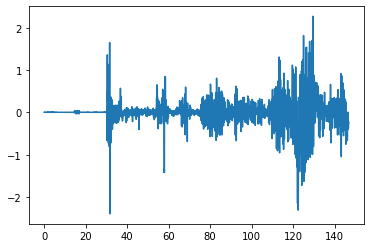

In [6]:
plt.plot(t_list, omega_x_list_raw)
plt.show()

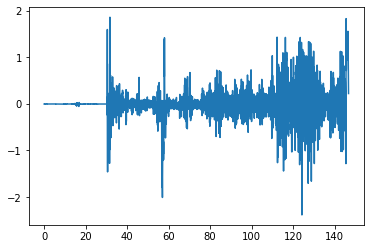

In [7]:
plt.plot(t_list, omega_y_list_raw)
plt.show()

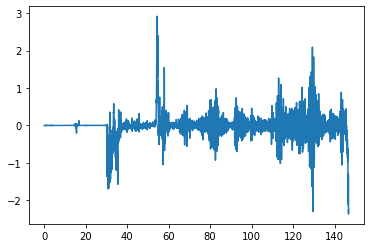

In [8]:
plt.plot(t_list, omega_z_list_raw)
plt.show()

In [9]:
def calibrator(target_list, t_list):
    index = next(item for item, val in enumerate(t_list) if val>5) # use first 5 secs to calibrate
    calibration_a = sum(target_list[:index])/index
    calibrated_list = target_list - calibration_a
    return calibrated_list

In [10]:
# accel_x_list = calibrator(accel_x_list_raw, t_list)
# accel_y_list = calibrator(accel_y_list_raw, t_list)
# accel_z_list = calibrator(accel_z_list_raw, t_list)
omega_x_list = calibrator(omega_x_list_raw, t_list)
omega_y_list = calibrator(omega_y_list_raw, t_list)
omega_z_list = calibrator(omega_z_list_raw, t_list)

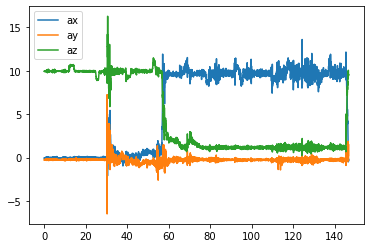

In [11]:
plt.plot(t_list, accel_x_list_raw, label='ax')
plt.plot(t_list, accel_y_list_raw, label='ay')
plt.plot(t_list, accel_z_list_raw, label='az')
plt.legend()
plt.show()

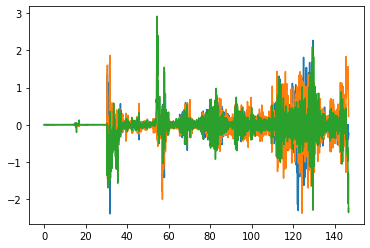

In [12]:
plt.plot(t_list, omega_x_list)
plt.plot(t_list, omega_y_list)
plt.plot(t_list, omega_z_list)
plt.show()

In [13]:
def rotation_corrector(accel_list, omega_x_list, omega_y_list, omega_z_list, t_interval):
    pass

In [14]:
rot_matrix = np.array([[1,0,0], [0,1,0],[0,0,1]])
accel_vec_abs_list = []
for index in range(t_interval_list.shape[0]):
    accel_vec = np.array([accel_x_list_raw[index], accel_y_list_raw[index], accel_z_list_raw[index]])
    accel_vec_abs = np.matmul(rot_matrix, accel_vec)
    accel_vec_abs_list.append(accel_vec_abs)
    theta_x = omega_x_list[index]*t_interval_list[index]
    theta_y = omega_y_list[index]*t_interval_list[index]
    theta_z = omega_z_list[index]*t_interval_list[index]
    del_rot_matrix = np.array([[np.cos(theta_y)*np.cos(theta_z), -np.cos(theta_y)*np.sin(theta_z), np.sin(theta_y)],
                     [(np.sin(theta_x)*np.sin(theta_y)*np.cos(theta_z) + np.cos(theta_x)*np.sin(theta_z)), (np.cos(theta_x)*np.cos(theta_z) - np.sin(theta_x)*np.sin(theta_y)*np.sin(theta_z)), np.sin(theta_x)*(-np.cos(theta_y))], 
                     [(np.sin(theta_x)*np.sin(theta_z) - np.cos(theta_x)*np.sin(theta_y)*np.cos(theta_z)), (np.cos(theta_x)*np.sin(theta_y)*np.sin(theta_z) + np.sin(theta_x)*np.cos(theta_z)), np.cos(theta_x)*np.cos(theta_y)]])
    rot_matrix = np.matmul(del_rot_matrix, rot_matrix)
accel_vec_abs_list = np.array(accel_vec_abs_list)

In [15]:
accel_vec_abs_list.shape

(10000, 3)

In [16]:
accel_x_abs_list = accel_vec_abs_list[:, 0]
accel_y_abs_list = accel_vec_abs_list[:, 1]
accel_z_abs_list = accel_vec_abs_list[:, 2]

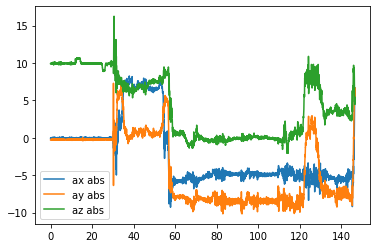

In [17]:
plt.plot(t_list, accel_x_abs_list, label='ax abs')
plt.plot(t_list, accel_y_abs_list, label='ay abs')
plt.plot(t_list, accel_z_abs_list, label='az abs')
plt.legend()
plt.show()

In [18]:
# import csv
# import numpy as np
# import matplotlib.pyplot as plt

# my_data = np.genfromtxt('./accelGyroLog489808449.csv',delimiter=',')



# t_list = []
# for index, t_interval in enumerate(my_data[:, 0]):
#     t_list.append(sum(my_data[:index, 0]))

# t_interval_list = my_data[:, 0]
# accel_x_list_raw = my_data[:,1]
# accel_y_list_raw = my_data[:,2]
# accel_z_list_raw = my_data[:,3]
# omega_x_list_raw = my_data[:,4]
# omega_y_list_raw = my_data[:,5]
# omega_z_list_raw = my_data[:,6]

# t_interval

# plt.plot(t_list, omega_x_list_raw)
# plt.show()

# plt.plot(t_list, omega_y_list_raw)
# plt.show()

# plt.plot(t_list, omega_z_list_raw)
# plt.show()

# def calibrator(target_list, t_list):
#     index = next(item for item, val in enumerate(t_list) if val>5) # use first 5 secs to calibrate
#     calibration_a = sum(target_list[:index])/index
#     calibrated_list = target_list - calibration_a
#     return calibrated_list

# # accel_x_list = calibrator(accel_x_list_raw, t_list)
# # accel_y_list = calibrator(accel_y_list_raw, t_list)
# # accel_z_list = calibrator(accel_z_list_raw, t_list)
# omega_x_list = calibrator(omega_x_list_raw, t_list)
# omega_y_list = calibrator(omega_y_list_raw, t_list)
# omega_z_list = calibrator(omega_z_list_raw, t_list)

# plt.plot(t_list, accel_x_list)
# plt.plot(t_list, accel_y_list)
# plt.plot(t_list, accel_z_list)
# plt.show()

# plt.plot(t_list, omega_x_list)
# plt.plot(t_list, omega_y_list)
# plt.plot(t_list, omega_z_list)
# plt.show()

# def rotation_corrector(accel_list, omega_x_list, omega_y_list, omega_z_list, t_interval):
#     pass

# rot_matrix = np.array([[1,0,0], [0,1,0],[0,0,1]])
# accel_vec_abs_list = []
# for index in range(t_interval_list.shape[0]):
#     accel_vec = np.array([accel_x_list_raw[index], accel_y_list_raw[index], accel_z_list_raw[index]])
#     accel_vec_abs = np.matmul(rot_matrix, accel_vec)
#     accel_vec_abs_list.append(accel_vec_abs)
#     theta_x = omega_x_list[index]*t_interval_list[index]
#     theta_y = omega_y_list[index]*t_interval_list[index]
#     theta_z = omega_z_list[index]*t_interval_list[index]
#     del_rot_matrix = np.array([[np.cos(theta_y)*np.cos(theta_z), -np.cos(theta_y)*np.sin(theta_z), np.sin(theta_y)],
#                      [(np.sin(theta_x)*np.sin(theta_y)*np.cos(theta_z) + np.cos(theta_x)*np.sin(theta_z)), (np.cos(theta_x)*np.cos(theta_z) - np.sin(theta_x)*np.sin(theta_y)*np.sin(theta_z)), np.sin(theta_x)*(-np.cos(theta_y))], 
#                      [(np.sin(theta_x)*np.sin(theta_z) - np.cos(theta_x)*np.sin(theta_y)*np.cos(theta_z)), (np.cos(theta_x)*np.sin(theta_y)*np.sin(theta_z) + np.sin(theta_x)*np.cos(theta_z)), np.cos(theta_x)*np.cos(theta_y)]])
#     rot_matrix = np.matmul(del_rot_matrix, rot_matrix)
# accel_vec_abs_list = np.array(accel_vec_abs_list)

# accel_vec_abs_list.shape

# accel_x_abs_list = accel_vec_abs_list[:, 0]
# accel_y_abs_list = accel_vec_abs_list[:, 1]
# accel_z_abs_list = accel_vec_abs_list[:, 2]

# plt.plot(t_list, accel_x_abs_list)
# plt.plot(t_list, accel_y_abs_list)
# plt.plot(t_list, accel_z_abs_list)
# plt.show()



# # my_data2 = np.genfromtxt('./accelGyroLog399505019.csv',delimiter=',')

# # t_list2 = []
# # for index, t_interval in enumerate(my_data2[:, 0]):
# #     t_list2.append(sum(my_data2[:index, 0]))

# # t_interval2 = my_data2[:, 0]
# # accel_x_list_raw2 = my_data2[:,1]
# # accel_y_list_raw2 = my_data2[:,2]
# # accel_z_list_raw2 = my_data2[:,3]
# # omega_x_list_raw2 = my_data2[:,4]
# # omega_y_list_raw2 = my_data2[:,5]
# # omega_z_list_raw2 = my_data2[:,6]

# # plt.plot(t_list2, omega_x_list_raw2)
# # plt.show()

# # plt.plot(t_list2, omega_y_list_raw2)
# # plt.show()

# # plt.plot(t_list2, omega_z_list_raw2)
# # plt.show()